# Import Library and Load the data

In [2]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# load the data
dataset = pd.read_csv('bank_loan.csv')
dataset

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91108,4,1/60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1/00,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1/90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0/40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0/30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0/50,2,0,0,0,0,1,0


# Preprocess the data 

In [4]:
# check whether this data contains null / categorical value
dataset.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  5000 non-null   int64 
 1   Age                 5000 non-null   int64 
 2   Experience          5000 non-null   int64 
 3   Income              5000 non-null   int64 
 4   ZIP Code            5000 non-null   int64 
 5   Family              5000 non-null   int64 
 6   CCAvg               5000 non-null   object
 7   Education           5000 non-null   int64 
 8   Mortgage            5000 non-null   int64 
 9   Personal Loan       5000 non-null   int64 
 10  Securities Account  5000 non-null   int64 
 11  CD Account          5000 non-null   int64 
 12  Online              5000 non-null   int64 
 13  CreditCard          5000 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 547.0+ KB


In [6]:
dataset['CCAvg']

0       1/60
1       1/50
2       1/00
3       2/70
4       1/00
        ... 
4995    1/90
4996    0/40
4997    0/30
4998    0/50
4999    0/80
Name: CCAvg, Length: 5000, dtype: object

In [7]:
#It seems that the / sign in column CCAvg represents a decimal. 
#Therefore, we first correct the CCAvg column by replace . instead of / and then convert type of CCAvg to float64:

dataset['CCAvg'] = dataset['CCAvg'].str.replace('/', '.').astype('float64')
dataset

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91108,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [9]:
dataset['Personal Loan'].value_counts()

Personal Loan
0    4520
1     480
Name: count, dtype: int64

# Experience column

In [10]:
# in experience column some values are negative so by using abs() changing the value with actual value
dataset[dataset['Experience']<0]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,537,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,541,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,577,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,584,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,598,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


In [11]:
dataset[dataset['Experience']<0] = dataset[dataset['Experience']<0].abs()
dataset

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91108,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [12]:
dataset[dataset['Experience']<0]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


In [13]:
# convert annual income to monthly with divide by 12, in descrition the ccavg value per month so need to convert the data based on month
dataset['Income'] = round(dataset['Income']/12,3)
dataset

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,4.083,91108,4,1.6,1,0,0,1,0,0,0
1,2,45,19,2.833,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,0.917,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,8.333,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,3.750,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,3.333,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,1.250,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,2.000,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,4.083,90034,3,0.5,2,0,0,0,0,1,0


# Dropping the unwanted column

In [14]:
dataset = dataset.drop(['ID','ZIP Code'],axis =1)
dataset

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,4.083,4,1.6,1,0,0,1,0,0,0
1,45,19,2.833,3,1.5,1,0,0,1,0,0,0
2,39,15,0.917,1,1.0,1,0,0,0,0,0,0
3,35,9,8.333,1,2.7,2,0,0,0,0,0,0
4,35,8,3.750,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,3.333,1,1.9,3,0,0,0,0,1,0
4996,30,4,1.250,4,0.4,1,85,0,0,0,1,0
4997,63,39,2.000,2,0.3,3,0,0,0,0,0,0
4998,65,40,4.083,3,0.5,2,0,0,0,0,1,0


In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   float64
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal Loan       5000 non-null   int64  
 8   Securities Account  5000 non-null   int64  
 9   CD Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 468.9 KB


In [16]:
dataset.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.134600,6.147856,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.415189,3.836153,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,0.000000,0.667000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,3.250000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,5.333000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,8.167000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,18.667000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


# To check the outliers

C:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


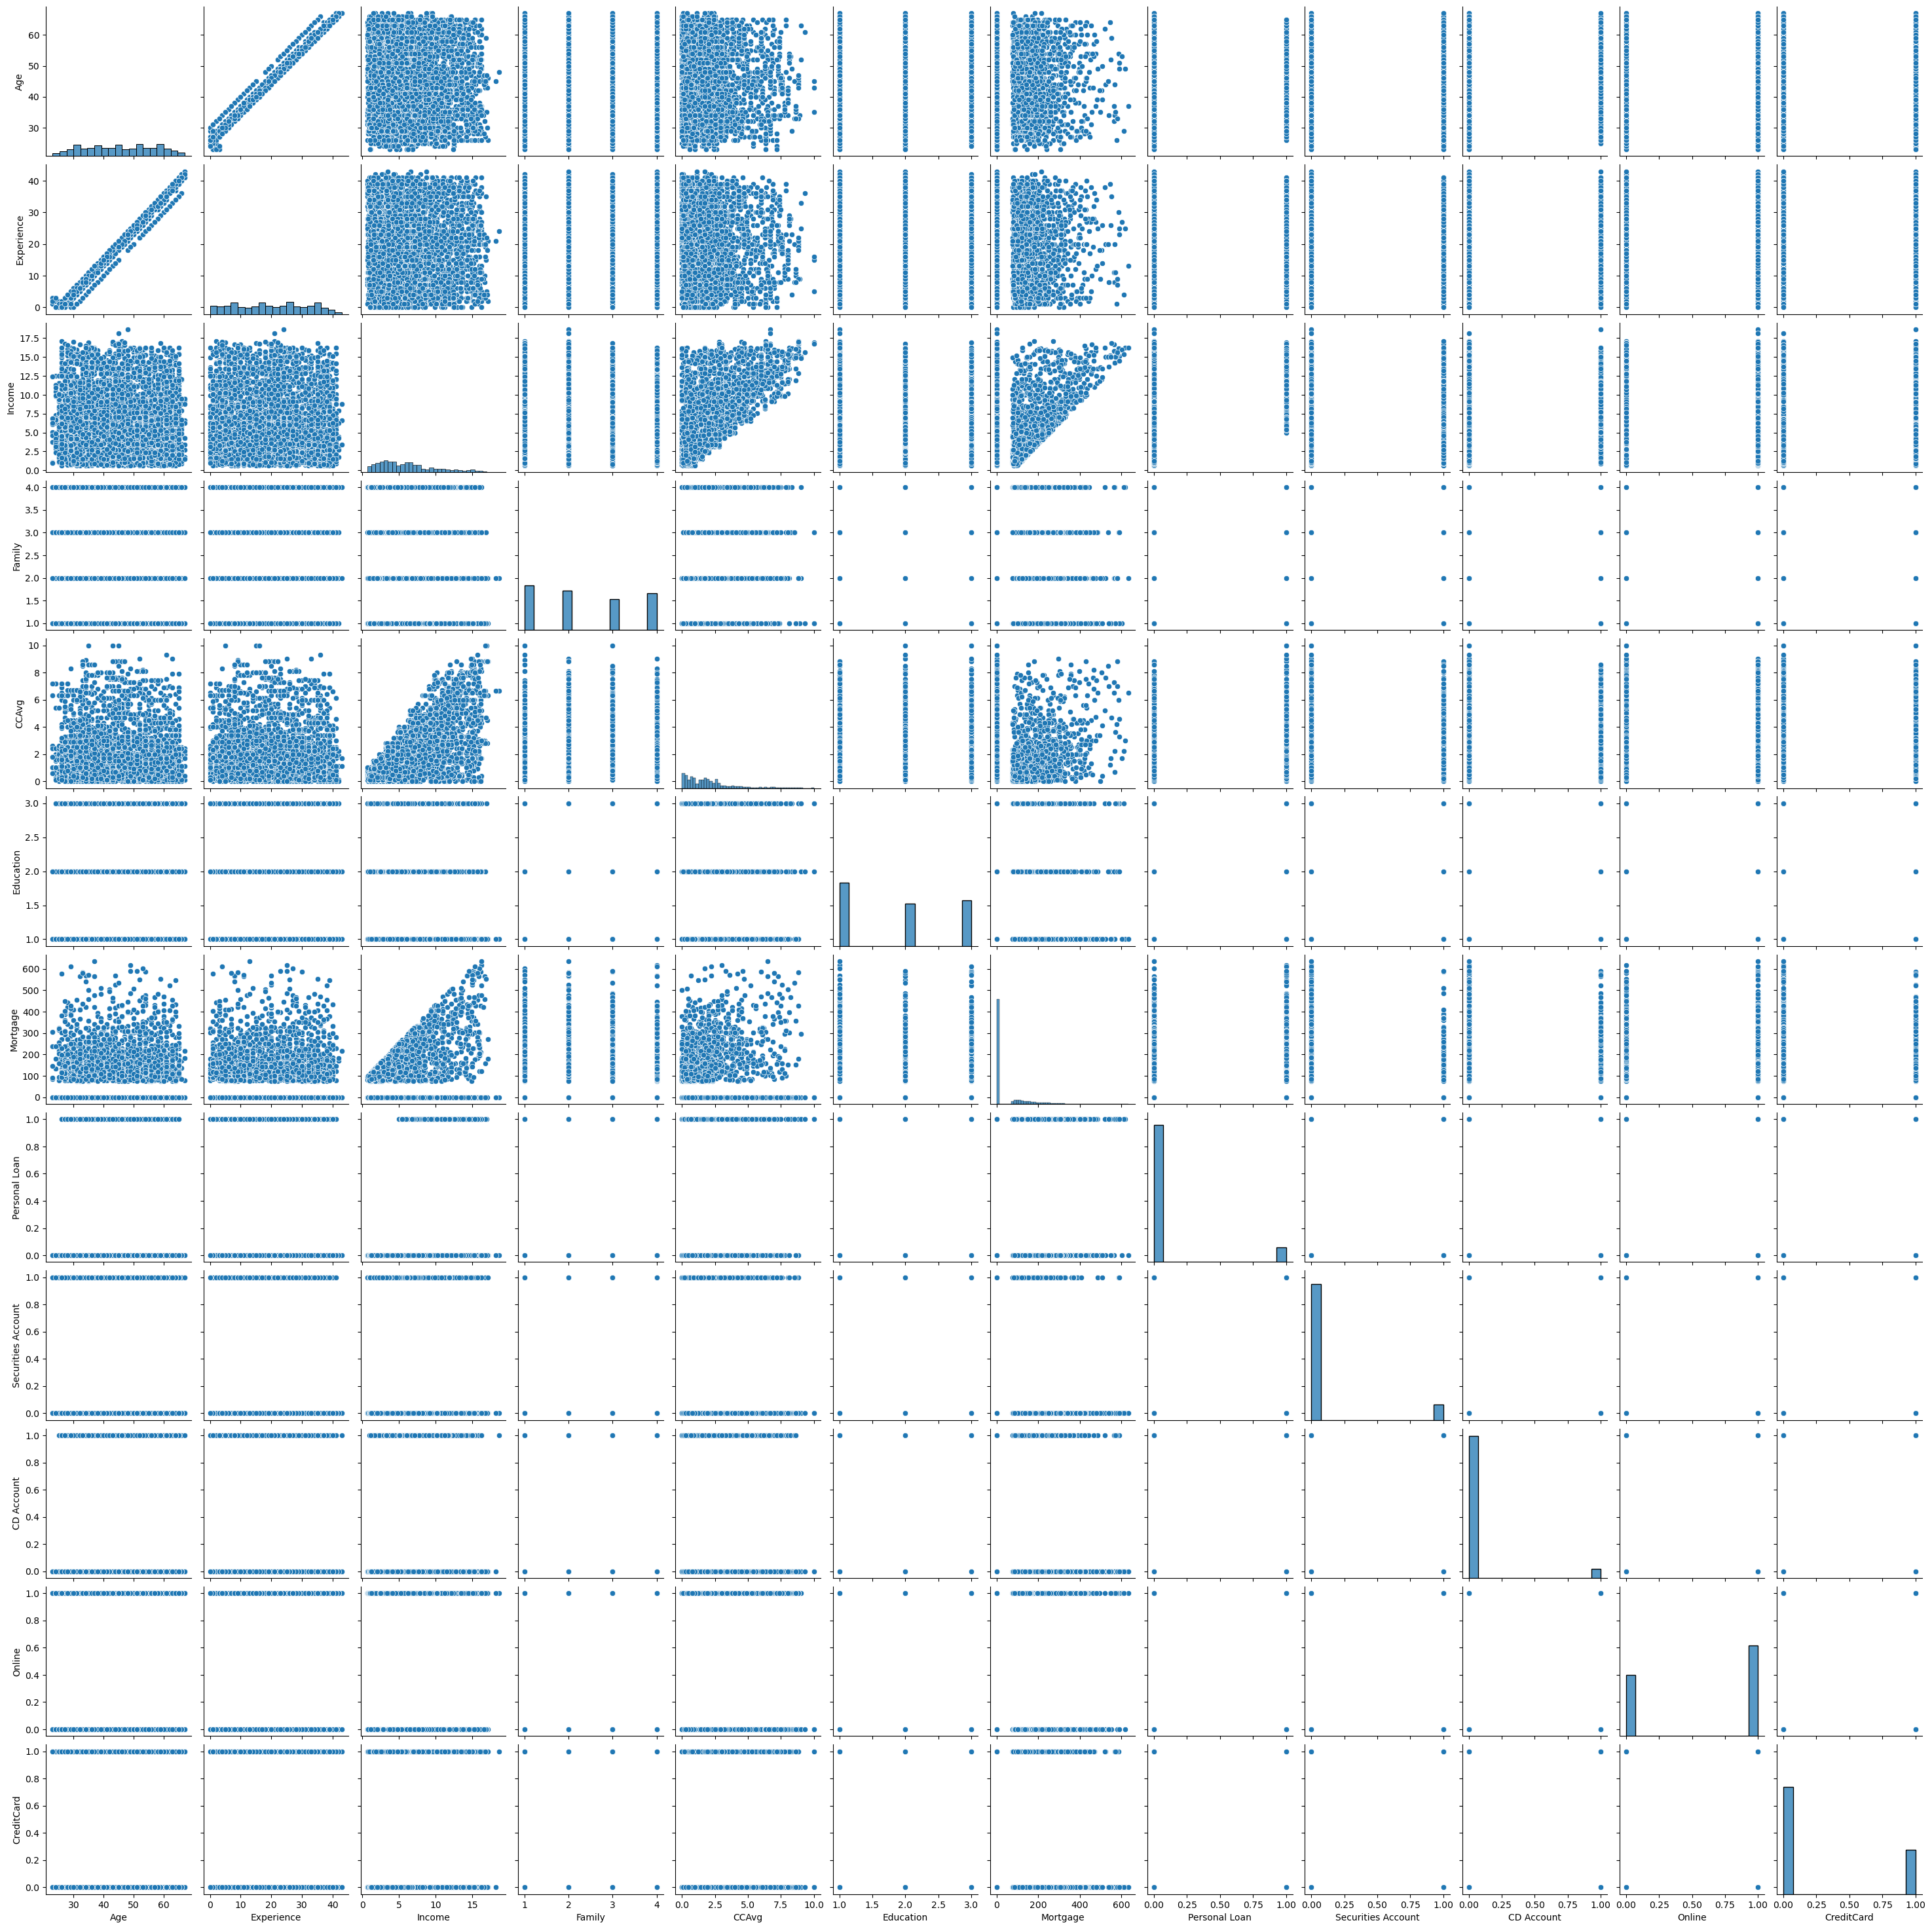

In [17]:
import seaborn as sns
sns.pairplot(dataset)

# To perform Standarization

In [18]:
dataset.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

In [19]:
# spliting the data into input and output

independent = dataset[['Age', 'Experience', 'Income', 'Family', 'CCAvg',
       'Education', 'Mortgage','Securities Account',
       'CD Account', 'Online', 'CreditCard']]
dependent = dataset[['Personal Loan']]

In [20]:
# split the training and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(independent, dependent, test_size=1/3, random_state=0)
X_train

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
3276,55,31,13.250,1,3.9,3,0,0,0,0,0
3688,51,26,14.917,1,8.1,1,0,1,0,1,0
2204,63,37,1.667,2,0.4,1,76,0,0,0,0
572,39,15,10.667,1,3.4,1,0,0,0,0,0
229,48,24,5.917,2,1.7,1,145,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4931,57,27,4.583,1,1.4,3,0,0,0,1,0
3264,67,41,9.500,4,2.4,3,0,0,0,1,0
1653,26,1,2.000,2,0.9,3,123,0,0,0,1
2607,57,33,4.083,4,1.5,1,214,1,1,1,1


In [21]:
# X_test

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
398,54,30,1.917,2,0.4,1,0,0,0,0,0
3833,33,9,6.917,1,0.1,1,0,0,0,1,0
4836,54,24,6.000,3,1.4,3,218,0,0,0,1
4572,32,7,6.750,4,1.8,3,0,0,0,1,0
636,40,16,10.000,2,6.1,1,196,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4004,65,39,1.833,3,0.7,2,0,0,0,0,0
418,27,0,2.750,4,1.0,3,0,0,0,0,0
1939,55,31,1.917,2,0.2,1,0,0,0,1,0
988,63,39,2.667,1,1.9,2,100,0,0,0,0


In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
# print(X_train)

[[ 0.84828524  0.95610387  1.84212902 ... -0.25733016 -1.2195546
  -0.64629297]
 [ 0.49973718  0.51929517  2.27478168 ... -0.25733016  0.81997149
  -0.64629297]
 [ 1.54538135  1.48027431 -1.16411922 ... -0.25733016 -1.2195546
  -0.64629297]
 ...
 [-1.67868818 -1.66474834 -1.07769251 ... -0.25733016 -1.2195546
   1.54728591]
 [ 1.02255927  1.13082735 -0.53707133 ...  3.88605832  0.81997149
   1.54728591]
 [-1.06872908 -0.96585442 -0.77480969 ... -0.25733016 -1.2195546
  -0.64629297]]


In [24]:
# X_test

array([[ 0.76114823,  0.86874213, -1.0992343 , ..., -0.25733016,
        -1.2195546 , -0.64629297],
       [-1.06872908, -0.96585442,  0.19846415, ..., -0.25733016,
         0.81997149, -0.64629297],
       [ 0.76114823,  0.34457169, -0.03953374, ..., -0.25733016,
        -1.2195546 ,  1.54728591],
       ...,
       [ 0.84828524,  0.95610387, -1.0992343 , ..., -0.25733016,
         0.81997149, -0.64629297],
       [ 1.54538135,  1.65499779, -0.90457953, ..., -0.25733016,
        -1.2195546 , -0.64629297],
       [ 0.15118913,  0.08248647,  0.19846415, ..., -0.25733016,
        -1.2195546 , -0.64629297]])

# Loading the preprocessed data into new dataset

In [25]:
dataset.to_csv('Pre_Loan_data.csv',index = False)

In [26]:
dataset = pd.read_csv('Pre_Loan_data.csv')
dataset

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,4.083,4,1.6,1,0,0,1,0,0,0
1,45,19,2.833,3,1.5,1,0,0,1,0,0,0
2,39,15,0.917,1,1.0,1,0,0,0,0,0,0
3,35,9,8.333,1,2.7,2,0,0,0,0,0,0
4,35,8,3.750,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,3.333,1,1.9,3,0,0,0,0,1,0
4996,30,4,1.250,4,0.4,1,85,0,0,0,1,0
4997,63,39,2.000,2,0.3,3,0,0,0,0,0,0
4998,65,40,4.083,3,0.5,2,0,0,0,0,1,0


In [27]:
dataset['Personal Loan'].value_counts()

Personal Loan
0    4520
1     480
Name: count, dtype: int64